# Home Assignment 1
Due by 8th May, 2024 at 23:59 CEST

## Neural Network Basics

We want to create a 2 layer NN, which means we want to calculate  $y = W_2 * ReLU(W_1 * x + b_1) + b_2$

Complete the TODOs below to create such a NN.

Since you will be needing to compute the gradients w.r.t. all parameters, you may look into online resources for help. Please cite or link any online recources you do use.

You are allowed to change any existing parts, however the code has to remain easy to understand and well documented.

In [150]:
import numpy as np

def relu(x):
    """
    ReLU activation function
    
    Parameters:
        x (np.ndarray): numpy array with shape (m, n) where m is the number of dimensions and n is the number of points
        
    Returns:
        x' (np.ndarray): return value of the pointwise ReLU application
    """
    # return 1 / (1 + np.exp(-x)) # this is the sigmoid function, not ReLU
    return np.maximum(0, x)  # ReLU function: max(0, x)


def relu_grad(x):
    # TODO: Write a function given a numpy array that calculates the gradient of the ReLU function w.r.t. `x`
    # TODO: Also write the derivation of the gradient in the PDF file In the implementation you may simply use the final derivation.
    # Hint: The function should return a numpy array of the same dimension that `x` has, but only containing 0 or 1
    return np.where(x > 0, 1, 0)


In [151]:
import numpy as np
import matplotlib.pyplot as plt

class NumPyNeuralNet:
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        self.dim_in = dim_in
        self.dim_hidden = dim_hidden
        self.dim_out = dim_out
        
        # TODO: Randomly initialize the weight matrices W_1, W_2 and biases b_1, b_2
        # Hint: use np.random.randn() and make sure to correctly set the dimensions 
        self.W_1 = np.random.randn(dim_hidden, dim_in) * np.sqrt(2.0 / dim_in)
        self.W_2 = np.random.randn(dim_out, dim_hidden) * np.sqrt(2.0 / dim_hidden)
        self.b_1 = np.zeros((dim_hidden, 1))
        self.b_2 = np.zeros((dim_out, 1))
        
        
    def predict(self, x):
        """
        Calculates the output of the neural network for the given x.
        
        Parameters:
            x (np.ndarray): input value numpy array
        
        Returns:
            y (np.ndarray): predicted output for `x`
        """
        z1 = np.dot(self.W_1, x) + self.b_1
        a1 = relu(z1)
        # basically this is w * x + b
        y = np.dot(self.W_2, a1) + self.b_2
        return y
    
    
    def loss(self, x, y):
        """
        Calculates the Mean-Squared Error and returns the gradients w.r.t. to the parameters.
        
        Parameters:
            x (np.ndarray): input value numpy array with shape (self.dim_in, n)
            y (np.ndarray): ground truth value numpy array with shape (self.dim_out, n)
            
        Returns:
            loss (float): Mean-Squared-Error between predicted value on input points and ground truth value
            W_1_grad (np.ndarray): gradient w.r.t W_1   
            W_2_grad (np.ndarray): gradient w.r.t W_2  
            b_1_grad (np.ndarray): gradient w.r.t b_1   
            b_2_grad (np.ndarray): gradient w.r.t b_2   
        """
        # forward pass
        # compute w * x + b
        z1 = np.dot(self.W_1, x) + self.b_1
        # give the result to activation function
        a1 = relu(z1)
        y_pred = np.dot(self.W_2, a1) + self.b_2
        
        # TODO: Calculate the loss (Mean-Squared-Error)
        # Hint: use np.square() and np.mean()
        loss = np.mean(np.square(y_pred - y))
        
        # backward pass
        dL_dy_pred = 2 * (y_pred - y) / y.shape[1]
        
        # TODO: Calculate all gradients w.r.t to the parameters
        # Hint: You need to calculate the gradients for each of the parameters by hand #TODO
        # Gradients of the loss w.r.t. W_2 and b_2
        dL_dW_2 = np.dot(dL_dy_pred, a1.T)
        dL_db_2 = np.sum(dL_dy_pred, axis=1, keepdims=True)
        
        # Gradients of the loss w.r.t. the hidden layer
        dL_dhidden = np.dot(self.W_2.T, dL_dy_pred) * relu_grad(z1)
        
        # Gradients of the loss w.r.t. W_1 and b_1
        dL_dW_1 = np.dot(dL_dhidden, x.T)
        dL_db_1 = np.sum(dL_dhidden, axis=1, keepdims=True)
        
        return loss, dL_dW_1, dL_dW_2, dL_db_1, dL_db_2
        
    def train(self, x, y, lr=0.0001, epochs=200):
        """
        Train the neural network with gradient descent.
        
        Parameters:
            x (np.ndarray): input values
            y (np.ndarray): ground truth values
            lr (float): learning rate, default: 0.0001
            epochs (int): number of epochs to train, default: 1000
            
        Returns:
            loss (float): Return the loss achieved after all epochs
        """
        # TODO: Keep track of the loss
        loss_history = []
        for i in range(epochs):
            # TODO: Compute loss with x and update parameters of the model using SGD
            loss, dL_dW_1, dL_dW_2, dL_db_1, dL_db_2 = self.loss(x, y)
            self.W_1 -= lr * dL_dW_1
            self.W_2 -= lr * dL_dW_2
            self.b_1 -= lr * dL_db_1
            self.b_2 -= lr * dL_db_2
            loss_history.append(loss)

        # TODO: Plot the loss history and return the loss achieved after the final epoch
        plt.plot(loss_history)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.show()
        return loss

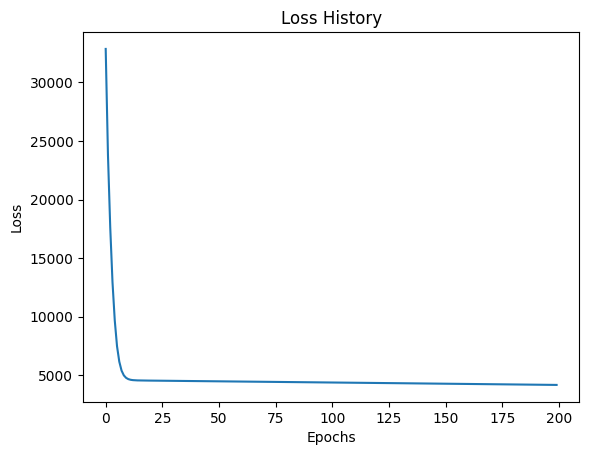

4163.622624325616


In [152]:
# We test the model created above on the simple function y = x^2

model = NumPyNeuralNet(1, 20, 1)

# Create a randomly distributed array of 1000 values
x_train = 10 * np.random.randn(1, 1000)
# Create ground truth by calculating x*x
y_train = x_train * x_train

loss = model.train(x_train, y_train)
print(loss)

## Embeddings

### Intrinsic evaluation of embeddings
Word similarity task is often used as an intrinsic evaluation criteria. In the dataset file you will find a list of word pairs with their similarity scores as judged by humans. The task would be to judge how well are the word vectors aligned to human judgement. We will use word2vec embedding vectors trained on the google news corpus. (Ignore the pairs where at least one the words is absent in the corpus)

In [153]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [154]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

Write a function which takes as input two words and computes the cosine similarity between them.
You do not need to implement the cosine similarity calculation from scratch. Feel free to use any Python library.
Remeber to ignore any pairs where at least one word is absent in the corpus. (2 points)

In [155]:
def similarity(word1, word2):
    vec1 = wv[word1]
    vec2 = wv[word2]
    # simply cosine similarity formula in the slides 
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

Compute the similarity between all the word pairs in the list and sort them based on the similarity scores. (1 point)

In [156]:
import pandas as pd
# Assuming `word_pairs` is a list of tuples containing word pairs and their human similarity scores
word_pairs_df = pd.read_csv('wordsim353_dataset.csv')

word_pairs_df.head()

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62


In [22]:
word_pairs = list(zip(word_pairs_df['Word 1'], word_pairs_df['Word 2'], word_pairs_df['Human (mean)']))

print("Word pairs:", word_pairs[:5])

Word pairs: [('love', 'sex', 6.77), ('tiger', 'cat', 7.35), ('tiger', 'tiger', 10.0), ('book', 'paper', 7.46), ('computer', 'keyboard', 7.62)]


In [23]:
# Compute similarity for each word pair and store with their scores
similarity_scores = []
for word1, word2, human_score in word_pairs:
    if word1 in wv and word2 in wv:
        sim_score = similarity(word1, word2)
        similarity_scores.append((word1, word2, sim_score, human_score))
    else:
        print(f"Word not found in Word2Vec: {word1}, {word2}")
similarity_scores_df = pd.DataFrame(similarity_scores, columns=['Word 1', 'Word 2', 'Cosine Similarity', 'Human Score'])
similarity_scores_df.to_csv('similarity_scores.csv', index=False)


In [24]:
similarity_scores_df.head()

,Word 1,Word 2,Cosine Similarity,Human Score
0,love,sex,0.263938,6.77
1,tiger,cat,0.517296,7.35
2,tiger,tiger,1.000000,10.00
3,book,paper,0.363463,7.46
4,computer,keyboard,0.396392,7.62


Sort the word pairs in the list based on the human judgement scores. (1 point)

In [25]:
sorted_word_pairs = sorted(word_pairs, key=lambda x: x[2], reverse=True)
print(sorted_word_pairs[:5])

[('tiger', 'tiger', 10.0), ('fuck', 'sex', 9.44), ('journey', 'voyage', 9.29), ('midday', 'noon', 9.29), ('dollar', 'buck', 9.22)]


Compute spearman rank correlation between the two ranked lists obtained in the previous two steps.
You do not need to implement the spearman rank correlation calculation from scratch. Feel free to use any Python library. (2 points)

In [26]:
from scipy.stats import spearmanr

# Compute Spearman rank correlation
human_scores = similarity_scores_df['Human Score']
cosine_similarities = similarity_scores_df['Cosine Similarity']

spearman_corr, _ = spearmanr(human_scores, cosine_similarities)
print(f"Spearman Rank Correlation: {spearman_corr}")

Spearman Rank Correlation: 0.7000166486272194


### Word embedding based clasifier
We will design a simple sentiment classifier based on the pre-trained word embeddings (google news).

Each data point is a movie review and the sentiment could be either positive (1) or negative (0)

In [29]:
import pickle
with open('sentiment_test_X.p', 'rb') as fs:
    test_X = pickle.load(fs)

len(test_X)

1821

In [30]:
test_X[0]

['If',
 'you',
 'sometimes',
 'like',
 'to',
 'go',
 'to',
 'the',
 'movies',
 'to',
 'have',
 'fun',
 ',',
 'Wasabi',
 'is',
 'a',
 'good',
 'place',
 'to',
 'start',
 '.']

In [31]:
with open('sentiment_test_y.p', 'rb') as fs:
    test_y = pickle.load(fs)
    
len(test_y)

1821

In [32]:
print(test_y[0])

1


In [33]:
with open('sentiment_train_X.p', 'rb') as fs:
    train_X = pickle.load(fs)
with open('sentiment_train_y.p', 'rb') as fs:
    train_y = pickle.load(fs)
with open('sentiment_val_X.p', 'rb') as fs:
    val_X = pickle.load(fs)
with open('sentiment_val_y.p', 'rb') as fs:
    val_y = pickle.load(fs)        

Given a review, compute its embedding by averaging over the embedding of its constituent words. Define a function which given a review as a list of words, generates its embeddings by averaging over the constituent word embeddings. (4 points)

In [143]:
def generate_embedding(review):
    vectors = [wv[word] for word in review if word in wv]
    if not vectors:
        print(f"No vectors found for review: {review}")
        return np.zeros(300)
    return np.mean(vectors, axis=0)

Create a feed-forward network class with pytorch. (Hyperparamter choice such as number of layers, hidden size is left to you) (8 points)

In [144]:
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(Classifier, self).__init__()
        self.Sequential = nn.Sequential(
            nn.Linear(embedding_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_dim, output_dim)
        )
        
    def forward(self, x):
        x = self.Sequential(x)
        return x

Create a Dataset class for efficiently enumerating over the dataset. (3 points)

In [145]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class SentimentDataset(Dataset):
    def __init__(self, X, y):
        self.X = [generate_embedding(review) for review in X]
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.tensor(self.X[idx], dtype=torch.float32)
        y = torch.tensor(self.y[idx], dtype=torch.long)
        return x, y

Write a train function to train model. At the end of each epoch compute the validation accuracy and save the model with the best validation accuracy. (12 points)

In [146]:
import torch.nn as nn
import torch.optim as optim

def train(model, train_loader, val_loader, epochs=5, lr=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(1, epochs+1):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        total_val_loss = 0.0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X)
                total_val_loss += criterion(outputs, batch_y).item()

        avg_val_loss = total_val_loss / len(val_loader)
        print(f"Epoch {epoch}/{epochs} — Validation Loss: {avg_val_loss:.4f}")

Evaluate the trained model on the test set and report the test accuracy. (3 points)

In [147]:
def evaluate(model, test_data):
    # write your code snippet here
    model.eval()
    correct = 0
    total = 0
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    
    with torch.no_grad():
        for batch in test_data:
            inputs, labels = batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Calculate metrics for each batch
            true_positives += ((predicted == 1) & (labels == 1)).sum().item()
            false_positives += ((predicted == 1) & (labels == 0)).sum().item()
            false_negatives += ((predicted == 0) & (labels == 1)).sum().item()
    
    test_accuracy = correct / total
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    return test_accuracy, precision, recall


In [157]:
"""
input: is the size of vector
hidden: is the size of the hidden layer
output: is the size of the output layer which is 2 for binary classification because we have two classes
"""
model = Classifier(300, 150, 2)
train_dataset = SentimentDataset(train_X, train_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = SentimentDataset(val_X, val_y)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataset = SentimentDataset(test_X, test_y) 
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


No vectors found for review: ['One-of-a-kind', 'near-masterpiece', '.']
No vectors found for review: ['Execrable', '.']
No vectors found for review: ['...', 'bibbidy-bobbidi-bland', '.']
No vectors found for review: ['Wishy-washy', '.']


In [158]:
train(model, train_loader, val_loader, epochs=200, lr=0.001)

Epoch 1/200 — Validation Loss: 0.4896
Epoch 2/200 — Validation Loss: 0.4464
Epoch 3/200 — Validation Loss: 0.4488
Epoch 4/200 — Validation Loss: 0.4436
Epoch 5/200 — Validation Loss: 0.4318
Epoch 6/200 — Validation Loss: 0.4424
Epoch 7/200 — Validation Loss: 0.4291
Epoch 8/200 — Validation Loss: 0.4326
Epoch 9/200 — Validation Loss: 0.4420
Epoch 10/200 — Validation Loss: 0.4334
Epoch 11/200 — Validation Loss: 0.4369
Epoch 12/200 — Validation Loss: 0.4489
Epoch 13/200 — Validation Loss: 0.4527
Epoch 14/200 — Validation Loss: 0.4390
Epoch 15/200 — Validation Loss: 0.4459
Epoch 16/200 — Validation Loss: 0.4406
Epoch 17/200 — Validation Loss: 0.4385
Epoch 18/200 — Validation Loss: 0.4365
Epoch 19/200 — Validation Loss: 0.4645
Epoch 20/200 — Validation Loss: 0.4565
Epoch 21/200 — Validation Loss: 0.4507
Epoch 22/200 — Validation Loss: 0.4542
Epoch 23/200 — Validation Loss: 0.4742
Epoch 24/200 — Validation Loss: 0.4690
Epoch 25/200 — Validation Loss: 0.4642
Epoch 26/200 — Validation Loss: 0.

In [160]:
# evaluate the model
evaluations = evaluate(model, test_loader)
print(evaluations)

(0.8099945085118067, 0.789311408016444, 0.8448844884488449)


In [162]:
torch.save(model, 'model.pth')